## Lasso vs Group Lasso

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.plotly as py 
import plotly.tools as tls 
import matplotlib.pyplot as plt 

In [2]:
flu= pd.read_csv('flu_99_sample.csv', encoding='euc-kr')#cp949

In [3]:
flu.head()

,DT,WK_CD,CNT,T_CNT,N_CNT,TEMP,HIGH_TEMP,LW_TEMP,HM,LW_HM,DR,WS,PRESS,SO2,PM10,NO2,O2,CO2
0,20120101,Hol,43397,4676,14,-0.12,3.78,-4.40,65.62,48.67,0.52,2.61,1024.01,0.009,66.27,0.021,0.025,0.971
1,20120102,Hon,517123,7405,37,-2.36,2.64,-6.87,62.62,43.90,0.22,1.90,1026.00,0.007,67.37,0.024,0.022,0.871
2,20120103,TUE,361808,8926,33,-1.62,2.82,-5.09,66.45,43.49,0.77,2.30,1021.68,0.007,68.88,0.025,0.022,0.900
3,20120104,WED,336775,10793,32,-3.79,-0.94,-6.08,59.85,42.66,0.95,3.25,1025.20,0.008,52.58,0.017,0.027,0.591
4,20120105,THU,348399,12729,43,-3.56,1.78,-7.86,57.26,35.96,0.75,2.08,1028.96,0.005,42.04,0.023,0.026,0.626


In [4]:
X_flu = flu.drop(['CNT','DT','WK_CD','PRESS'], axis=1)
y_flu = flu['CNT']
one_hot_day = pd.get_dummies(flu['WK_CD'])
X_flu = X_flu.join(one_hot_day)

#### Ridge

In [5]:
def ridge(X_train, y_train, X_test, y_test, alpha=0.1):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    clf = Ridge(alpha, max_iter=2000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_test = y_test.ravel()
    mse = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    rsquare = r2_score(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    print("Ridge's Rsquare : {}".format(rsquare))
    print("Ridge's RMSE : {}".format(rmse))
    print("Ridge's MAPE : {}".format(MAPE))
    return rsquare, rmse, MAPE

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_flu, y_flu, test_size=0.25, random_state=0)

In [7]:
alpha = 10
ridge(X_train, y_train, X_test, y_test, alpha)
print("Finish!")

Ridge's Rsquare : 0.8157769447815232
Ridge's RMSE : 222.56727662129887
Ridge's MAPE : 33.15318408708653
Finish!


### Lasso

In [8]:
def lasso(X_train, y_train, X_test, y_test, alpha=0.1):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    clf = Lasso(alpha, max_iter=2000 ,normalize=True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_test = y_test.ravel()
    mse = mean_absolute_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    rsquare = r2_score(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    print("Lasso's Rsquare : {}".format(rsquare))
    print("Lasso's RMSE : {}".format(rmse))
    print("Lasso's MAPE : {}".format(MAPE))
    return clf, rsquare, rmse, MAPE

In [9]:
alpha = 1000 #15
clf, rsquare, rmse, MAPE = lasso(X_train, y_train, X_test, y_test, alpha)

Lasso's Rsquare : 0.6842620512904021
Lasso's RMSE : 254.27354545910518
Lasso's MAPE : 42.967966604921756


In [10]:
print(clf.coef_) #변수들의 목록과 해당 값을 같이 보여주는거 추가  

[  0.00000000e+00   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
  -2.31092174e+03  -0.00000000e+00  -1.94401702e+02  -0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   3.78610983e+05
  -0.00000000e+00   0.00000000e+00   0.00000000e+00  -1.03228961e+05
   0.00000000e+00   7.11500892e+04  -0.00000000e+00  -1.87570581e+05
   0.00000000e+00   0.00000000e+00  -0.00000000e+00]


In [11]:
scaler = StandardScaler()
X_ttrain = scaler.fit_transform(X_train)
X_ttest = scaler.fit_transform(X_test)

In [12]:
alpha = 15
clf, rsquare, rmse, MAPE = lasso(X_ttrain, y_train, X_ttest, y_test, alpha)

Lasso's Rsquare : 0.8367584588260846
Lasso's RMSE : 217.87259329914642
Lasso's MAPE : 30.92048141400394


In [13]:
np.std(y_test)

145782.82392499596

### *Tuning hyperparameter 

Lasso 

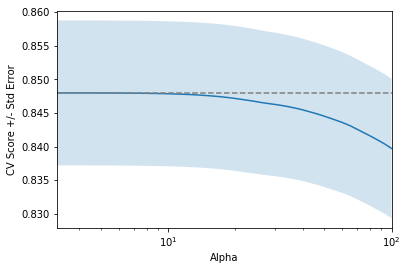

3.16227766017


In [14]:
alpha_space = np.logspace(0.5, 2, 50)
Lasso_scores = []
Lasso_scores_std = []

Lasso_cv = Lasso(normalize=True)
lasso_results = dict()
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    Lasso_cv.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    Lasso_cv_scores = cross_val_score(Lasso_cv, X_ttrain, y_train, cv=5)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    lasso_cv_avg = np.mean(Lasso_cv_scores)
    Lasso_scores.append(lasso_cv_avg)
    lasso_results[alpha] = lasso_cv_avg
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    Lasso_scores_std.append(np.std(Lasso_cv_scores))
    

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(Lasso_scores, Lasso_scores_std)
lasso_lambda = max(lasso_results, key=lasso_results.get)
print(lasso_lambda)

In [15]:
alpha = 3.162
clf, rsquare, rmse, MAPE = lasso(X_train, y_train, X_test, y_test, alpha)

Lasso's Rsquare : 0.8339772342347973
Lasso's RMSE : 217.2394860093321
Lasso's MAPE : 31.268360835814935


Ridge

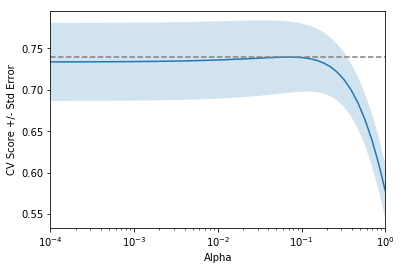

0.0719685673001


In [16]:
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge_cv = Ridge(normalize=True)
ridge_results = dict()
# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge_cv.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge_cv, X_flu, y_flu, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_cv_avg = np.mean(ridge_cv_scores)
    ridge_scores.append(ridge_cv_avg)
    ridge_results[alpha] = ridge_cv_avg
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Use this function to create a plot    
def display_plot2(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot2(ridge_scores, ridge_scores_std)
ridge_lambda = max(ridge_results, key=ridge_results.get)
print(ridge_lambda)

In [17]:
alpha = 0.071968
ridge(X_train, y_train, X_test, y_test, alpha)
print("Finish!")

Ridge's Rsquare : 0.8283349570617053
Ridge's RMSE : 220.4131142620762
Ridge's MAPE : 32.111631673397916
Finish!


#### Group Lasso 

In [21]:
!pip install grouplasso

  Running setup.py bdist_wheel for grouplasso ... done
  Stored in directory: /Users/yonsei/Library/Caches/pip/wheels/77/ae/a9/0e94a7f3255ce40badb59a9c1207565f226c40113f0f9b1af6
  Running setup.py bdist_wheel for sklearn ... done
  Stored in directory: /Users/yonsei/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built grouplasso sklearn
You are using pip version 9.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [22]:
from grouplasso import GroupLassoRegressor

In [23]:
np.random.seed(0)
X = np.random.randn(10, 3)
# target variable is strongly correlated with 0th feature.
y = X[:, 0] + np.random.randn(10) * 0.1

In [24]:
group_ids = np.array([0, 0, 1])

In [25]:
model = GroupLassoRegressor(group_ids=group_ids, random_state=42, verbose=False, alpha=1e-1)
model.fit(X, y)

In [26]:
model.coef_

array([ 0.84795902, -0.01193463, -0.        ])

In [27]:
X_train.head()

,T_CNT,N_CNT,TEMP,HIGH_TEMP,LW_TEMP,HM,LW_HM,DR,WS,SO2,...,CO2,FRI,Hol,Hon,MON,SAT,SUN,THU,TUE,WED
452,7148,22,9.86,17.13,3.23,49.93,23.51,0.02,2.17,0.005,...,0.582,0,0,0,0,0,0,1,0,0
337,15239,37,3.73,8.82,-0.68,75.11,49.17,3.71,2.82,0.005,...,0.789,0,0,0,1,0,0,0,0,0
509,3023,31,21.69,29.61,14.63,62.68,30.19,0.00,1.64,0.006,...,0.640,1,0,0,0,0,0,0,0,0
77,8435,29,7.74,12.81,3.31,75.12,52.47,0.77,2.54,0.004,...,0.652,0,0,0,0,0,1,0,0,0
451,6926,48,9.13,16.82,2.17,52.41,25.13,0.07,1.84,0.005,...,0.691,0,0,0,0,0,0,0,0,1


In [28]:
group_ids = np.array([1,1,2,2,2,3,3,3,3,4,4,4,4,4,5,5,5,5,5,5,5,5,5])
model = GroupLassoRegressor(group_ids=group_ids, alpha=0.0001, max_iter=10,verbose=True)
model.fit(X_train, y_train)

model.coef_
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

training loss: 100636716171.0
training loss: 4.00332210814e+24
training loss: 2.16064076158e+38
training loss: 1.16612362818e+52
training loss: 6.29370851635e+65
training loss: 3.39678966549e+79
training loss: 1.83328795758e+93
training loss: 9.89447409586e+106
training loss: 5.34016586039e+120
training loss: 2.88215130387e+134


/anaconda3/lib/python3.6/site-packages/grouplasso/model.py:138: UserWarning:

Failed to converge. Increase the number of iterations.



1.1088491646308609e+74

![hahah2](angry.png)

### Negative binomial regression in python